# Import lib

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Get dataset

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Remove unimportant features

In [4]:
data = data.iloc[:, 3:]
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
transformer = ColumnTransformer([('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')

# OneHot Encoding

In [15]:
X = transformer.fit_transform(X)
X.shape

(10000, 13)

# Split data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 13) (8000,)
(2000, 13) (2000,)


# Scale data

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Neural Network with keras

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13), name='Input layer'),
    tf.keras.layers.Dense(6, activation='relu', name='fc1'),
    tf.keras.layers.Dense(6, activation='relu', name='fc2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 6)                 84        
_________________________________________________________________
fc2 (Dense)                  (None, 6)                 42        
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [22]:
train = model.fit(X_train, y_train, batch_size=512, epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8365
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8370
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8381
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8382
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8385
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8386
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8394
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8395
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8405
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8403
Epoch 11/

# Evaluate

In [21]:
import matplotlib.pyplot as plt

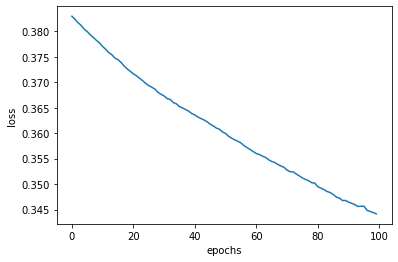

In [25]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(train.history['loss'])
plt.show()

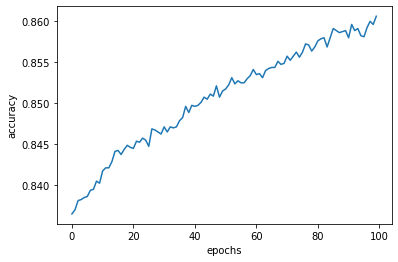

In [27]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(train.history['accuracy'])
plt.show()

In [29]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 790us/step - loss: 0.3457 - accuracy: 0.8550


[0.345693439245224, 0.8550000190734863]

# Kfold Cross-validation

In [32]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [35]:
temp = []
epochs = 100
batch_size = 512
split = 5
loss = 0
acc = 0

for train_idx, test_idx in cv.split(X, y):
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test= sc.transform(X_test)

  model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13), name='Input layer'),
    tf.keras.layers.Dense(6, activation='relu', name='fc1'),
    tf.keras.layers.Dense(6, activation='relu', name='fc2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
  )
  model_train = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
  temp.append(model_train)
  eval = model.evaluate(X_test, y_test)
  loss += eval[0]
  acc += eval[1]

loss /= split
acc /= split 

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.8405 - accuracy: 0.3814
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7787 - accuracy: 0.4549
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7328 - accuracy: 0.5260
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5864
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6327
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6720
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.7106
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.7439
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5933 - accuracy: 0.7664
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7816
Epoch 11/

In [36]:
print('Loss: ', loss)
print('Accuracy: ', acc)

Loss:  0.36283613443374635
Accuracy:  0.8483000040054322


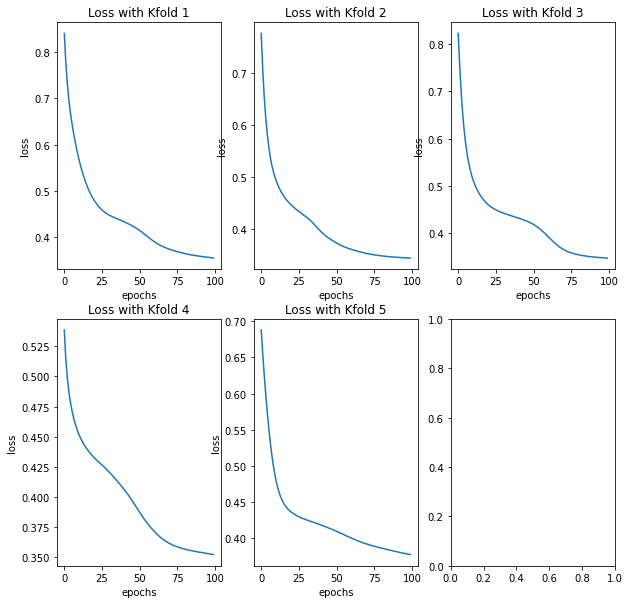

In [55]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))
index = 0
for row in range(2):
  for col in range(3):
    if index < len(temp):
      ax[row][col].plot(temp[index].history['loss'])
      ax[row][col].set(xlabel='epochs', ylabel='loss')
      ax[row][col].set_title(f'Loss with Kfold {index+1}')
      index += 1
plt.show()

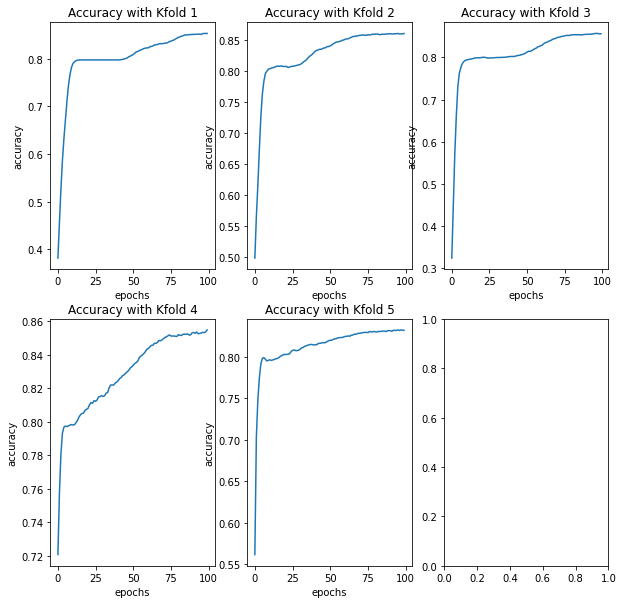

In [56]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))
index = 0
for row in range(2):
  for col in range(3):
    if index < len(temp):
      ax[row][col].plot(temp[index].history['accuracy'])
      ax[row][col].set(xlabel='epochs', ylabel='accuracy')
      ax[row][col].set_title(f'Accuracy with Kfold {index+1}')
      index += 1
plt.show()

# Test with new data

In [54]:
'''
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $ 60000
No.of Products: 2
Has credit card: Yes
Active Member: Yes
Estimated Salary: $50000
'''

X_customer = [[600, 'France', 'Male', 40, 3, 60000, 2, 1, 1, 50000]]
X_customer = transformer.transform(X_customer)
X_customer = scaler.transform(X_customer)
y_pred = model.predict(X_customer)
print(f'Is exited: {y_pred[0][0] >= 0.5}')

Is exited: False
